<a href="https://colab.research.google.com/github/deenukhan/deep_learning/blob/main/5_1_cnn_on_mnist_data_MIT_s191.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Notebook is inspired by MIT S191 Lecture Series and all rights are reserved to MIT

# Copyright 2021 MIT 6.S191 Introduction to Deep Learning. All Rights Reserved.
# 
# Licensed under the MIT License. You may not use this file except in compliance
# with the License. Use and/or modification of this code outside of 6.S191 must
# reference:
#
# © MIT 6.S191: Introduction to Deep Learning
# http://introtodeeplearning.com

## **MNIST Digit Classification**

In the first portion of this lab, we will build and train a convolutional neural network (CNN) for classification of handwritten digits from the famous MNIST dataset. The MNIST dataset consists of 60,000 training images and 10,000 test images. Our classes are the digits 0-9.

First, let's download the course repository, install dependencies, and import the relevant packages we'll need for this lab.

In [4]:
import tensorflow as tf
from tensorflow import keras

# !pip install mitdeeplearning
import mitdeeplearning as md1

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [41]:
# Let's download and load the dataset and display a few random samples from it:
# Here we are downloading the dataset, adding one more axis to each image, and normalizing the image

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = (np.expand_dims(X_train, axis = -1)/255).astype(np.float32)
X_test = (np.expand_dims(X_test, axis = -1)/255).astype(np.float32)
y_train = (y_train).astype(np.int64)
y_test = y_test.astype(np.int64)

In [42]:
print("Training data Shape : ", X_train.shape)
print("Testing Data Shape : ", X_test.shape)
print("Training Labels Sahpe : ", y_train.shape)
print("Testing labels Shape : ", y_test.shape)

Training data Shape :  (60000, 28, 28, 1)
Testing Data Shape :  (10000, 28, 28, 1)
Training Labels Sahpe :  (60000,)
Testing labels Shape :  (10000,)


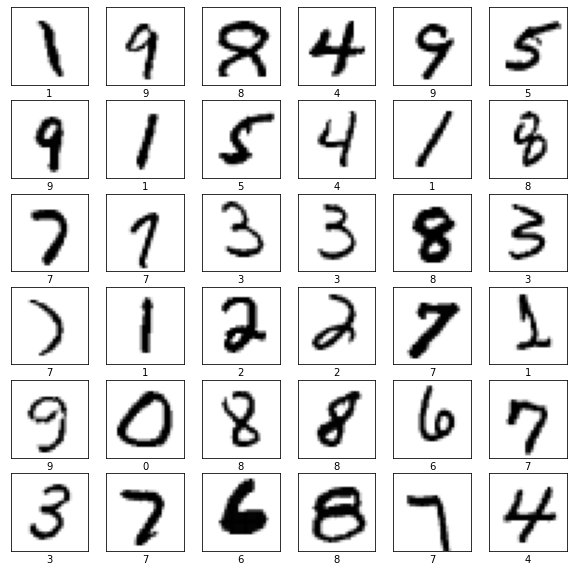

In [13]:
# Our training set is made up of 28x28 grayscale images of handwritten digits.
# Let's visualize what some of these images and their corresponding training labels look like.


plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(X_train[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(X_test[image_ind])

In [34]:
keras.backend.clear_session()
np.random.seed(43)
tf.random.set_seed(43)

def fc_model_mnist():
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation = 'relu'))
    # model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

model = fc_model_mnist()


As we progress through this next portion, you may find that you'll want to make changes to the architecture defined above. Note that in order to update the model later on, you'll need to re-run the above cell to re-initialize the model.

Let's take a step back and think about the network we've just created. The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (28 x 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. You can think of this layer as unstacking rows of pixels in the image and lining them up. There are no learned parameters in this layer; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are fully-connected neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer (which you've defined!) should return an array of probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the handwritten digit classes.

That defines our fully connected model!

## **Compile the model**

Before training the model, we need to define a few more settings. These are added during the model's compile step:

Loss function — This defines how we measure how accurate the model is during training. As was covered in lecture, during training we want to minimize this function, which will "steer" the model in the right direction.
Optimizer — This defines how the model is updated based on the data it sees and its loss function.
Metrics — Here we can define metrics used to monitor the training and testing steps. In this example, we'll look at the accuracy, the fraction of the images that are correctly classified.
We'll start out by using a stochastic gradient descent (SGD) optimizer initialized with a learning rate of 0.1. Since we are performing a categorical classification task, we'll want to use the cross entropy loss.

You'll want to experiment with both the choice of optimizer and learning rate and evaluate how these affect the accuracy of the trained model.

In [35]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## **Train the model**

We're now ready to train our model, which will involve feeding the training data (train_images and train_labels) into the model, and then asking it to learn the associations between images and labels. We'll also need to define the batch size and the number of epochs, or iterations over the MNIST dataset, to use during training.

In [36]:
model.fit(X_train, y_train, batch_size=64, epochs = 20, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.6438 - accuracy: 0.8198 - val_loss: 0.2403 - val_accuracy: 0.9309
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2332 - accuracy: 0.9338 - val_loss: 0.1830 - val_accuracy: 0.9501
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1752 - accuracy: 0.9491 - val_loss: 0.1512 - val_accuracy: 0.9588
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1451 - accuracy: 0.9582 - val_loss: 0.1329 - val_accuracy: 0.9622
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1155 - accuracy: 0.9681 - val_loss: 0.1207 - val_accuracy: 0.9672
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0958 - accuracy: 0.9736 - val_loss: 0.1102 - val_accuracy: 0.9687
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0888 - accuracy: 0.9763 - val_loss: 0.1039 - val_accuracy: 0.9692
Epoch 

In [38]:
model.evaluate(X_test, y_test)

# We are getting 97.68% Accuracy on Testing data and that is great

313/313 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9768


[0.07025373727083206, 0.9768000245094299]

## **Convolutional Neural Network (CNN) for handwritten digit classification**

convolutional neural networks (CNNs) are particularly well-suited for a variety of tasks in computer vision, and have achieved near-perfect accuracies on the MNIST dataset. We will now build a CNN composed of two convolutional layers and pooling layers, followed by two fully connected layers, and ultimately output a probability distribution over the 10 digit classes (0-9). The CNN we will be building is depicted below

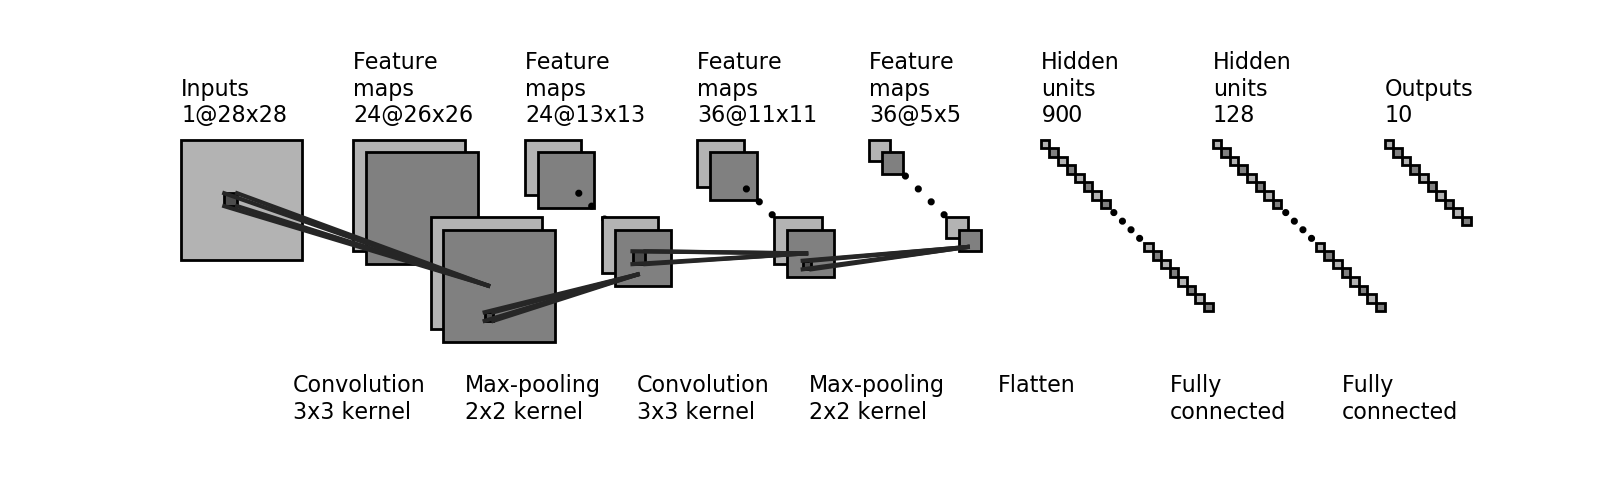

In [49]:
keras.backend.clear_session()
np.random.seed(43)
tf.random.set_seed(43)

def cnn_model_mnist():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(24, kernel_size=3, padding = 'same', activation='relu'))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

    model.add(keras.layers.Conv2D(36, kernel_size = 3, padding='same', activation ='relu'))
    model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.Dense(128, activation ='relu'))
    model.add(keras.layers.Dense(10, activation = 'softmax'))

    return model

model  = cnn_model_mnist()  

In [50]:
model.compile(optimizer='SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs = 20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 35s 6ms/step - loss: 1.1191 - accuracy: 0.6627 - val_loss: 0.2014 - val_accuracy: 0.9399
Epoch 2/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1853 - accuracy: 0.9443 - val_loss: 0.1325 - val_accuracy: 0.9603
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1209 - accuracy: 0.9636 - val_loss: 0.0927 - val_accuracy: 0.9732
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0955 - accuracy: 0.9713 - val_loss: 0.0955 - val_accuracy: 0.9697
Epoch 5/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0749 - accuracy: 0.9769 - val_loss: 0.0771 - val_accuracy: 0.9771
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0620 - accuracy: 0.9810 - val_loss: 0.0692 - val_accuracy: 0.9798
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0590 - accuracy: 0.9815 - val_loss: 0.0783 - val_accuracy

In [51]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0375 - accuracy: 0.9869


[0.03754017502069473, 0.9868999719619751]